# Analysis of Slot Distribution in the Rhetorical Structure

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

data_path = "../Data/slots_data/rhet_data_slots.json"

In [83]:
rhet_dict = {
    "identification":{},
    "description":{},
    "process":{},
    "smell_taste":{},
    "service_suggestions":{},
    "quality_assurance":{}
}
rhet_num_words = {
    "identification":{},
    "description":{},
    "process":{},
    "smell_taste":{},
    "service_suggestions":{},
    "quality_assurance":{}
}
rhet_list = [k for k,_ in rhet_dict.items()]
with open(data_path, 'r') as f:
    records = json.load(f)
    files = list(records.keys())
    file_0 = files[0]
    ident_keys = records[file_0]['identification']['slots'].keys()
    desc_keys = records[file_0]['description']['slots'].keys()
    proc_keys = records[file_0]['process']['slots'].keys()
    smell_taste_keys = records[file_0]['smell_taste']['slots'].keys()
    service_sugg_keys = records[file_0]['service_suggestions']['slots'].keys()
    qty_assur_keys = records[file_0]['quality_assurance']['slots'].keys()
    
    # innitialize dict keys
    rhet_dict["identification"] = {k.split(" ")[0]:0 for k in ident_keys}
    rhet_dict["description"] = {k.split(" ")[0]:0 for k in desc_keys}
    rhet_dict["process"] = {k.split(" ")[0]:0 for k in proc_keys}
    rhet_dict["smell_taste"] = {k.split(" ")[0]:0 for k in smell_taste_keys}
    rhet_dict["service_suggestions"] = {k.split(" ")[0]:0 for k in service_sugg_keys}
    rhet_dict["quality_assurance"] = {k.split(" ")[0]:0 for k in qty_assur_keys}

    rhet_num_words["identification"] = {k.split(" ")[0]:[] for k in ident_keys}
    rhet_num_words["description"] = {k.split(" ")[0]:[] for k in desc_keys}
    rhet_num_words["process"] = {k.split(" ")[0]:[] for k in proc_keys}
    rhet_num_words["smell_taste"] = {k.split(" ")[0]:[] for k in smell_taste_keys}
    rhet_num_words["service_suggestions"] = {k.split(" ")[0]:[] for k in service_sugg_keys}
    rhet_num_words["quality_assurance"] = {k.split(" ")[0]:[] for k in qty_assur_keys}
    
    error_records = 0
    for file in files:
        record = records[file]
        for rhet in rhet_list:
            slot = record[rhet]['slots']
            for slot_name, slot_value in slot.items():
                # check if slot_vlaue is none or contains value
                slot_name = slot_name.split(" ")[0]
                if slot_name not in rhet_dict[rhet]:
                    error_records+=1
                    continue
                
                if "None" not in slot_value:
                    rhet_dict[rhet][slot_name]+=1
                    # get number of words
                    # print(slot_value.split(" "))
                    rhet_num_words[rhet][slot_name].append(len(slot_value.split(" ")))

print('Error Records: ', error_records)

Error Records:  178


In [84]:
rhet_dict

{'identification': {'NameOfCheese': 594,
  'QualityOfRind': 591,
  'AnimalSource': 215,
  'MainIngredient': 62,
  'MainIngredientWeight': 4,
  'NameOfCheesery': 507,
  'NamesOfFacilities': 207,
  'ManufacturePlace': 592,
  'ManufacturedSinceDate': 160,
  'CheeseOriginatedDate': 94,
  'CheeseCreatorMovedFromPlace': 109,
  'CheeseCreatorMovedToPlace': 101,
  'CheeseNameFromObject': 157},
 'description': {'CheeseProductFatContent': 231,
  'CheeseProductTexture': 600,
  'CheeseProductTaste': 514,
  'CheeseProductRind': 435,
  'CheeseProductColor': 279,
  'CheeseProductStyle': 476,
  'CheeseProductIsVegetarian': 592,
  'CheeseProductIsOrganic': 524,
  'CheeseProductIsUnpasteurised': 519,
  'CheeseProductIsPregnantOk': 469,
  'CheeseProductGeneralShape': 409,
  'CheeseProductWaxColor': 41,
  'CheeseProductInteriorColor': 99,
  'CheeseProductPrePackShape': 87,
  'CheeseProductPackWeight': 373,
  'CheeseProductSlices': 5,
  'CheeseProductCheeseType': 499,
  'CheeseProductMilkQuality': 439,
  '

In [85]:
# ! pip install seaborn


# Plot the Distribution of Data

In [86]:

import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
def plot_histogram(data, title):
    # Extract categories and their frequencies from the dictionary
    sns.set_style('darkgrid')
    categories = list(data.keys())
    frequencies = list(data.values())
    
    # Calculate the appropriate figure size based on the number of categories
    fig_width = max(len(categories) * 0.5, 8)  # Adjust as needed
    fig_height = 6

    # Create a larger figure to accommodate the x-axis labels
    plt.figure(figsize=(fig_width, fig_height))
    # Plot a bar plot
    ax = sns.barplot(x=categories, y=frequencies, palette="husl")
    
    plt.xlabel('Slots')
    plt.ylabel('Frequency')
    plt.title(title)
    # tilt the labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
    save_path = title + ".png"
    plt.savefig(save_path, bbox_inches='tight')
    
    plt.show()
    

In [88]:
ident_data = rhet_dict['identification']
desc_data = rhet_dict['description']
proc_data = rhet_dict['process']
smell_taste_data = rhet_dict['smell_taste']
service_data = rhet_dict['service_suggestions']
qty_data = rhet_dict['quality_assurance']

In [92]:
# word statistics

ident_data1 = rhet_num_words['identification']
desc_data1 = rhet_num_words['description']
proc_data1 = rhet_num_words['process']
smell_taste_data1 = rhet_num_words['smell_taste']
service_data1 = rhet_num_words['service_suggestions']
qty_data1 = rhet_num_words['quality_assurance']

# for k,v in ident_data1.items():
#     print(k, ': ', v)
# for zero entries
proc_data1['CheeseAgingDays'] = [0,0]
proc_data1['CheeseAgingYears'] = [0,0]

import statistics
import copy

def find_std(l):
    if len(l)>=2:
        return statistics.stdev(l)
    else:
        return 0.0
def find_max_and_next_max(lst):
    max_val = max(lst)
    lst = copy.deepcopy(lst)
    lst.remove(max_val)
    next_max_val = max(lst, default=None)
    return next_max_val
# Calculate the standard deviation
ident_data_stats = {k:[find_max_and_next_max(v),round(sum(v)/len(v),2),round(find_std(v),2)] for k, v in ident_data1.items()}
desc_data_stats = {k:[find_max_and_next_max(v),round(sum(v)/len(v),2),round(find_std(v),2)] for k, v in desc_data1.items()} 
proc_data_stats = {k:[find_max_and_next_max(v),round(sum(v)/len(v),2),round(find_std(v),2)] for k, v in proc_data1.items()} 
smell_taste_data_stats = {k:[find_max_and_next_max(v),round(sum(v)/len(v),2),round(find_std(v),2)] for k, v in smell_taste_data1.items()} 
service_data_stats = {k:[find_max_and_next_max(v),round(sum(v)/len(v),2),round(find_std(v),2)] for k, v in service_data1.items()} 
qty_data_stats = {k:[find_max_and_next_max(v),round(sum(v)/len(v),2),round(find_std(v),2)] for k, v in qty_data1.items()}


In [98]:
qty_data_stats

{'MedalType': [7, 1.5, 1.01],
 'Contest': [13, 3.75, 1.83],
 'ContestYear': [3, 1.27, 0.6],
 'ContestCategory': [7, 3.11, 1.38],
 'ContestPlace': [6, 1.96, 1.21],
 'Prize': [6, 3.01, 1.2],
 'Position': [3, 1.81, 0.54],
 'AnimalMilk': [4, 1.46, 0.64],
 'NameOfCheesery': [5, 2.27, 0.92],
 'RegisteredAnimal': [3, 1.71, 0.99],
 'ManufacturePlace': [4, 1.59, 0.74]}

In [71]:
# ident_data_stats

# Indentification

/home/edt000/u/tmp/ipykernel_355036/4026299816.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=frequencies, palette="husl")
/home/edt000/u/tmp/ipykernel_355036/4026299816.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')


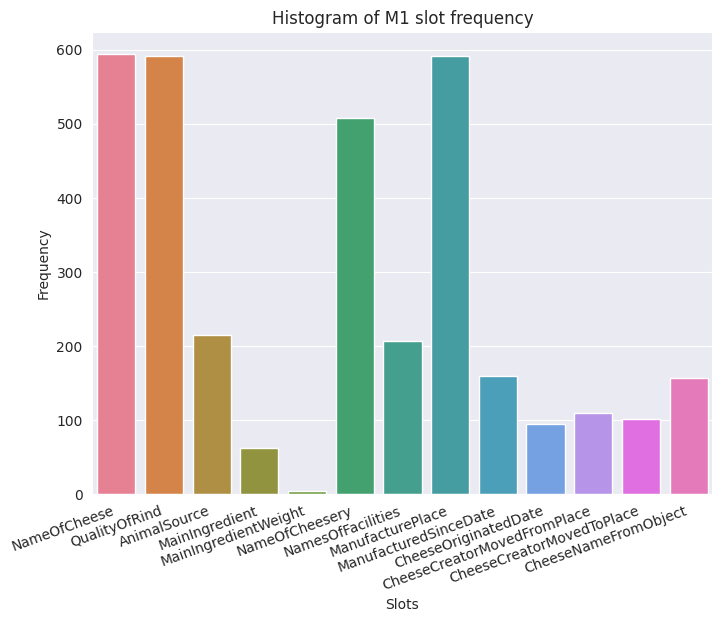

In [34]:
# Plot the histogram using the sample data
plot_histogram(ident_data, 'Histogram of M1 slot frequency')

# Description

/home/edt000/u/tmp/ipykernel_355036/4026299816.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=frequencies, palette="husl")
/home/edt000/u/tmp/ipykernel_355036/4026299816.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')


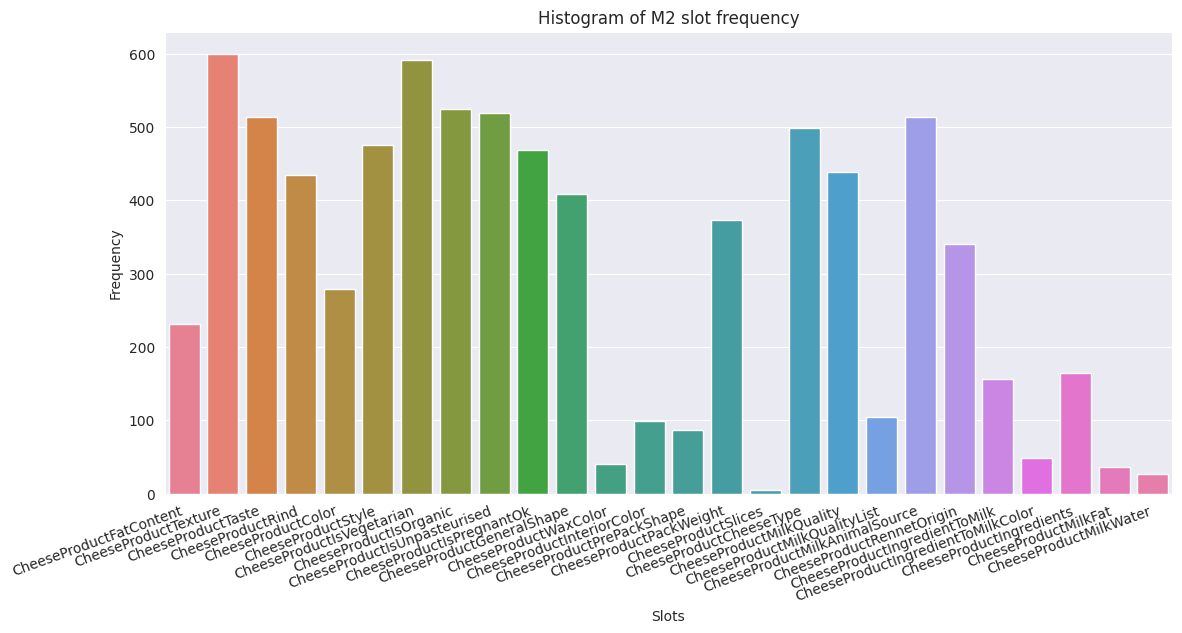

In [35]:
plot_histogram(desc_data, 'Histogram of M2 slot frequency')

# Process

/home/edt000/u/tmp/ipykernel_355036/4026299816.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=frequencies, palette="husl")
/home/edt000/u/tmp/ipykernel_355036/4026299816.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')


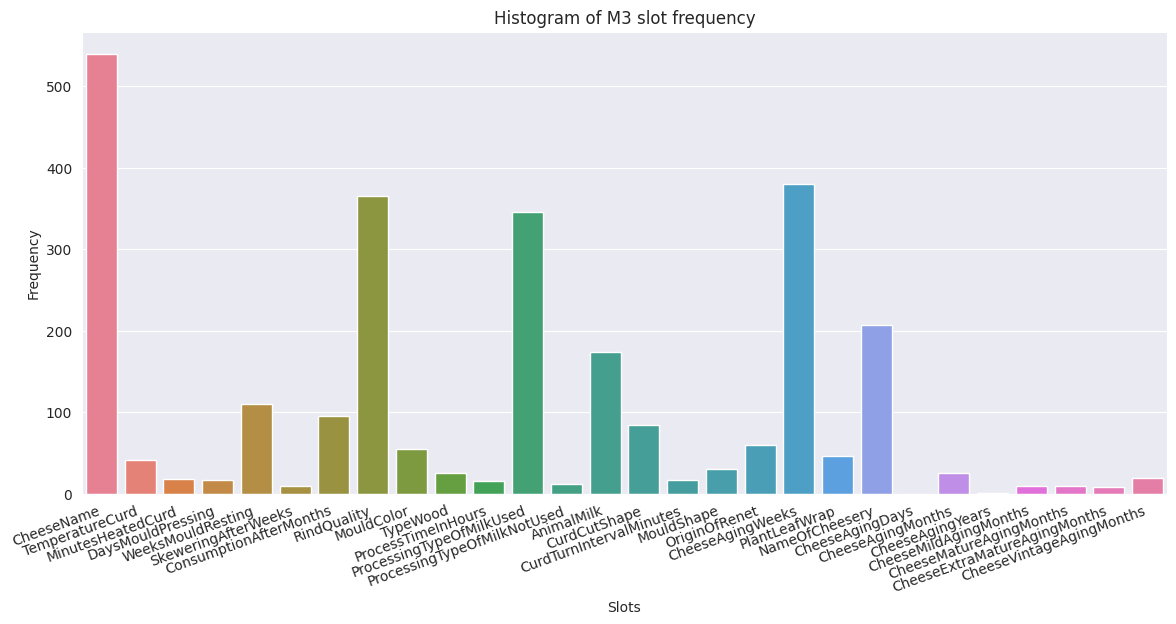

In [36]:
plot_histogram(proc_data, 'Histogram of M3 slot frequency')

# Smell & Taste

/home/edt000/u/tmp/ipykernel_355036/4026299816.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=frequencies, palette="husl")
/home/edt000/u/tmp/ipykernel_355036/4026299816.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')


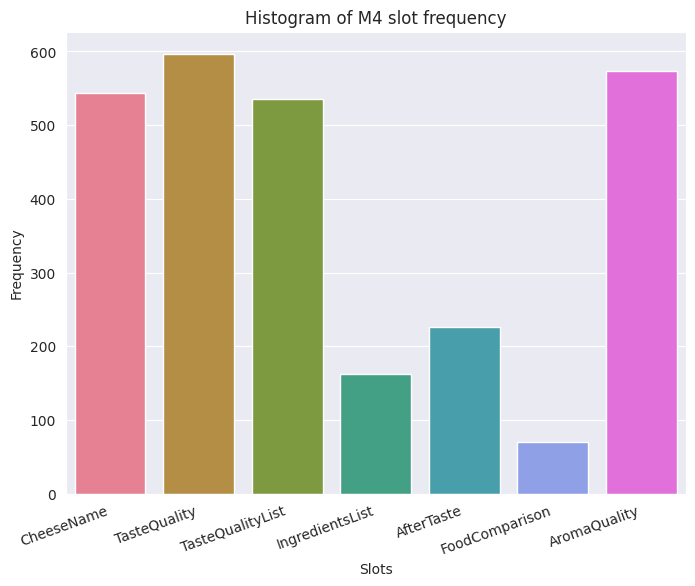

In [37]:
plot_histogram(smell_taste_data, 'Histogram of M4 slot frequency')

# Service Suggestions

/home/edt000/u/tmp/ipykernel_355036/4026299816.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=frequencies, palette="husl")
/home/edt000/u/tmp/ipykernel_355036/4026299816.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')


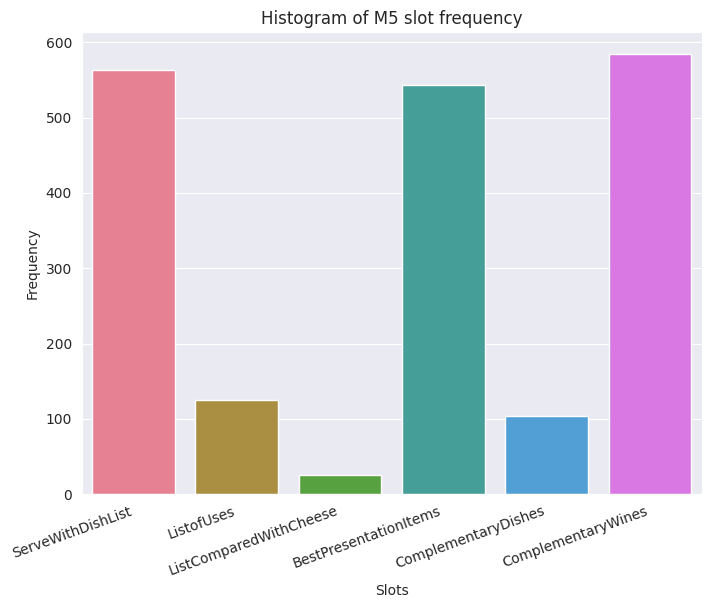

In [38]:
plot_histogram(service_data, 'Histogram of M5 slot frequency')

# Quality Assurance

/home/edt000/u/tmp/ipykernel_355036/4026299816.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=frequencies, palette="husl")
/home/edt000/u/tmp/ipykernel_355036/4026299816.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')


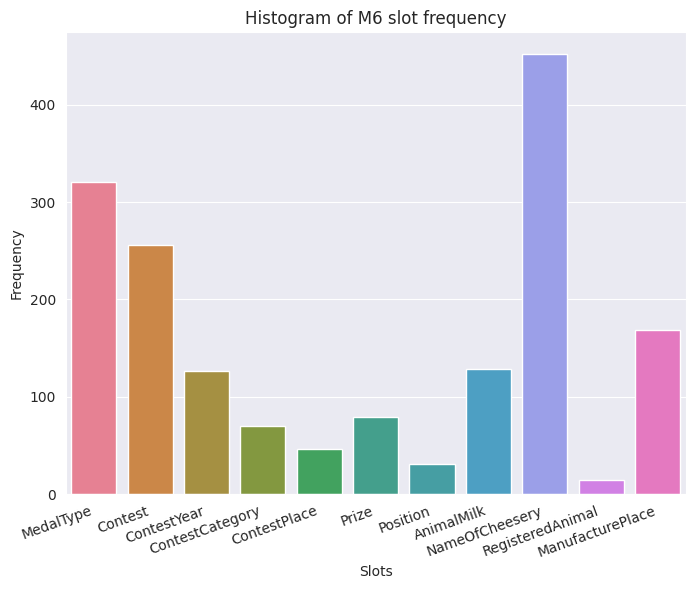

In [39]:
plot_histogram(qty_data, 'Histogram of M6 slot frequency')

# Data Cleaning

In [24]:
import json
import copy

rhet_dict = {
    "identification":{},
    "description":{},
    "process":{},
    "smell_taste":{},
    "service_suggestions":{},
    "quality_assurance":{}
}
rhet_list = [k for k,_ in rhet_dict.items()]

data_path = "../data/slots_data/rhet_data_slots.json"
data_write_path = "../data/slots_data/rhet_data_slots_cleaned.json"

with open(data_path, 'r') as f, open(data_write_path, 'w') as f1:
    records = json.load(f)
    files = list(records.keys())
    file_0 = files[0]
    ident_keys = records[file_0]['identification']['slots'].keys()
    desc_keys = records[file_0]['description']['slots'].keys()
    proc_keys = records[file_0]['process']['slots'].keys()
    smell_taste_keys = records[file_0]['smell_taste']['slots'].keys()
    service_sugg_keys = records[file_0]['service_suggestions']['slots'].keys()
    qty_assur_keys = records[file_0]['quality_assurance']['slots'].keys()
    
    # innitialize dict keys
    rhet_dict["identification"] = {k.split(" ")[0]:0 for k in ident_keys}
    rhet_dict["description"] = {k.split(" ")[0]:0 for k in desc_keys}
    rhet_dict["process"] = {k.split(" ")[0]:0 for k in proc_keys}
    rhet_dict["smell_taste"] = {k.split(" ")[0]:0 for k in smell_taste_keys}
    rhet_dict["service_suggestions"] = {k.split(" ")[0]:0 for k in service_sugg_keys}
    rhet_dict["quality_assurance"] = {k.split(" ")[0]:0 for k in qty_assur_keys}
    
    for file in files:
        record = records[file]
        for rhet in rhet_list:
            slot = record[rhet]['slots']
            slot_copy = copy.deepcopy(slot)
            for slot_name, slot_value in slot.items():
                # check if slot_vlaue is none or contains value
                slot_name_ = slot_name.split(" ")[0]
                if slot_name_ not in rhet_dict[rhet]:
                    # delete the slot
                    del slot_copy[slot_name]
                elif slot_name_ != slot_name:
                    slot_copy[slot_name_] = slot_value
                    del slot_copy[slot_name]

            record[rhet]['slots'] = slot_copy
        
        records[file] = record
    # write cleaned records
    json.dump(records, f1)

# Total Cleaned and Uncleaned records

In [30]:
total_uncleaned = 0
with open(data_path, 'r') as f:
    json_obj = json.load(f)
    for file in json_obj:
        for rhet in json_obj[file]:
            total_uncleaned+=len(list(json_obj[file][rhet]['slots'].items()))
print('Total uncleaned records: ', total_uncleaned)

Total uncleaned records:  54660


In [31]:
total_cleaned = 0
with open(data_write_path, 'r') as f:
    json_obj = json.load(f)
    for file in json_obj:
        for rhet in json_obj[file]:
            total_cleaned+=len(list(json_obj[file][rhet]['slots'].items()))
print('Total cleaned records: ', total_cleaned)

Total cleaned records:  54482


In [32]:
assert error_records+total_cleaned== total_uncleaned, "Error in data cleaning, total records dont match"

## Note: While Creating the DataSet class ignore tasks that have no slot values or an empty dictionary as a result of cleaning. These are the error records in the dataset